In [ ]:
print("hello")

hello


In [ ]:
!python --version


Python 3.10.12


In [ ]:
import torch
print(torch.__version__)

2.0.1+cu118


In [ ]:
x=torch.Tensor(2,3)
x=torch.tensor([[1,2,3],[4,5,6]])

In [ ]:
x=torch.tensor(data=[2.0,3.0],requires_grad=True)
y=x**2
z=2*y+3  #예측 값


In [ ]:
target=torch.tensor([3.0,4.0 ])   #정답 Y를의미
loss=torch.sum(torch.abs(z-target))  #ABS는 절대값
loss.backward()

print(x.grad,y.grad,z.grad)


tensor([ 8., 12.]) None None


<ipython-input-6-adbd05e0601a>:5: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print(x.grad,y.grad,z.grad)


In [ ]:
import numpy as np
import torch

import torch.nn as nn

import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt


In [ ]:
num_data=1000
num_epoch=500

noise=init.normal_(torch.FloatTensor(num_data,1),std=0.2)
x=init.uniform_(torch.Tensor(num_data,1),-10,10)
y=2*x+3
y_noise=y+noise


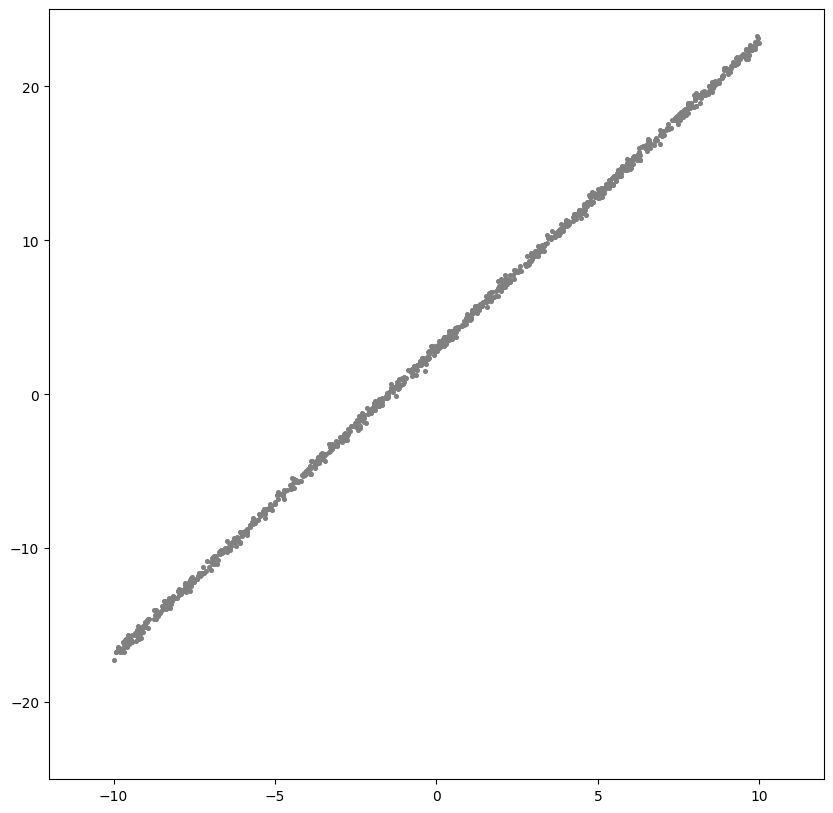

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x.numpy(),y_noise.numpy(),s=7,c="gray")
plt.axis([-12,12,-25,25])
plt.show()

In [ ]:
model=nn.Linear(1,1)
loss_func=nn.L1Loss()
optimizer=optim.SGD(model.parameters(),lr=0.01)


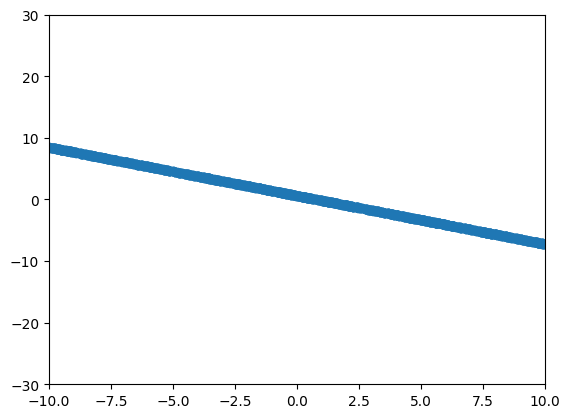

tensor(13.9237)


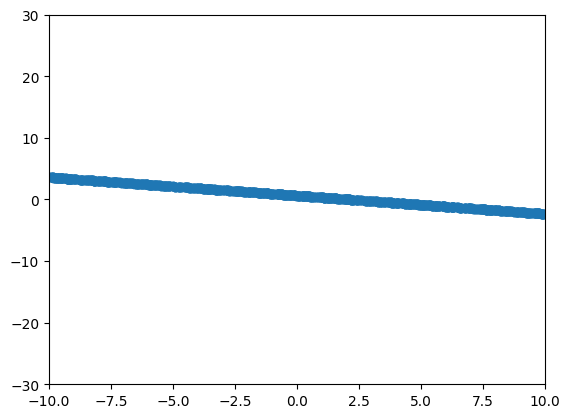

tensor(11.5403)


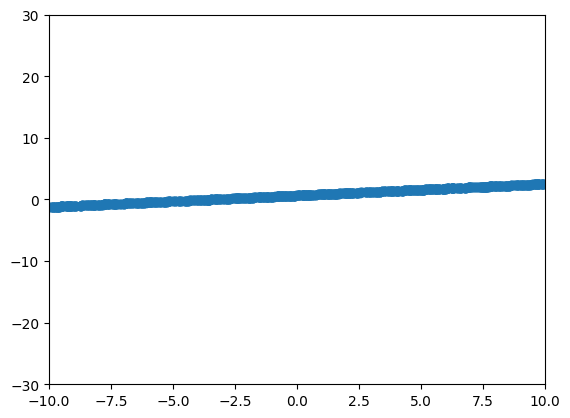

tensor(9.1800)


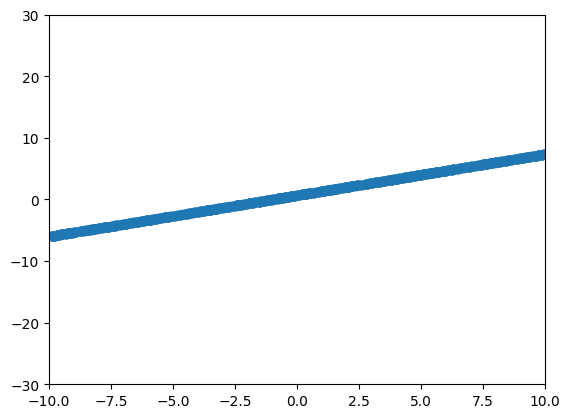

tensor(6.8672)


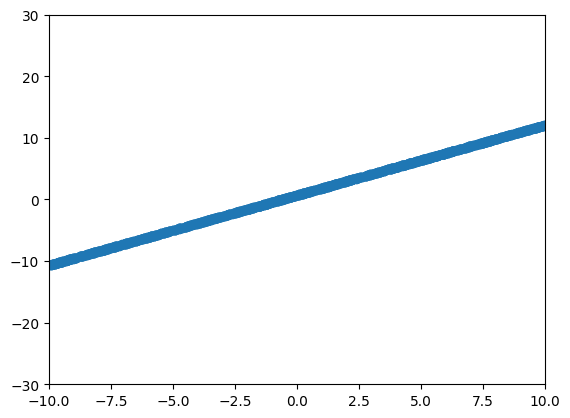

tensor(4.6670)


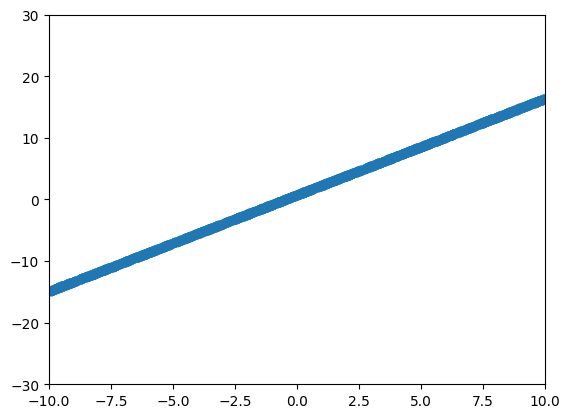

tensor(2.8339)


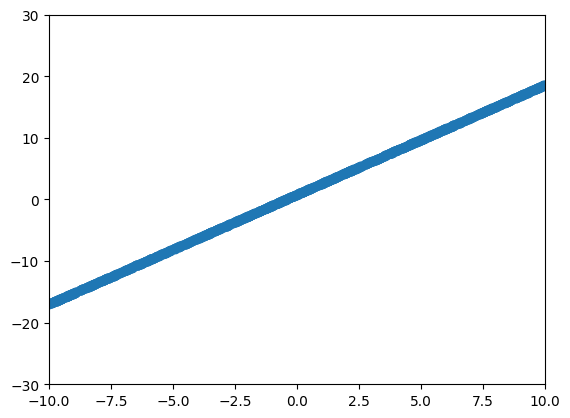

tensor(2.2242)


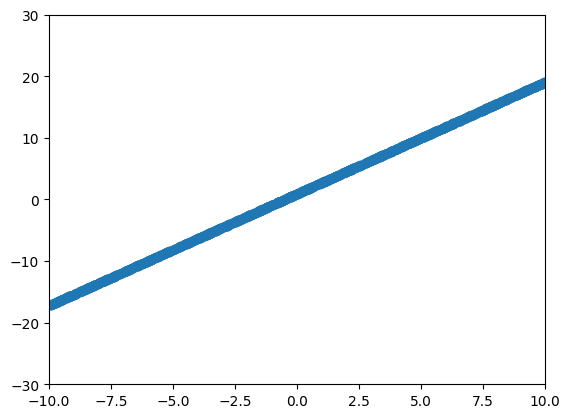

tensor(2.1158)


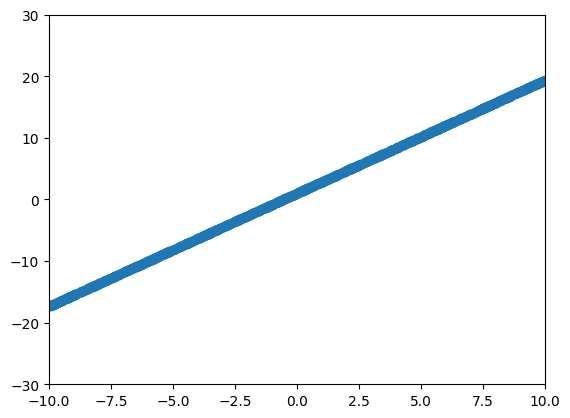

tensor(2.0127)


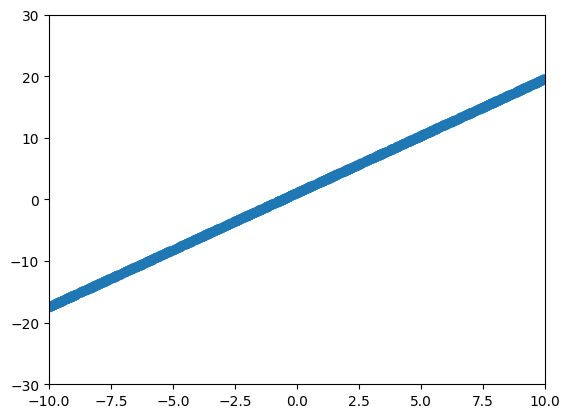

tensor(1.9104)


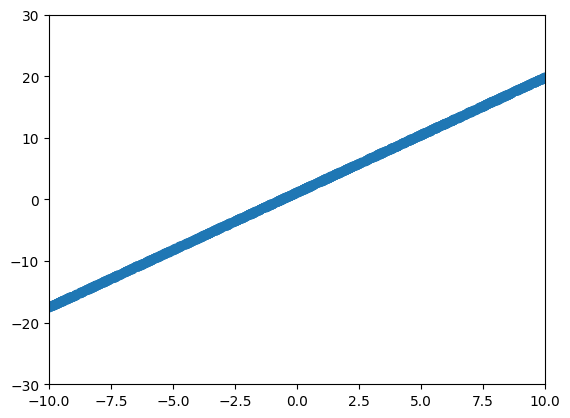

tensor(1.8083)


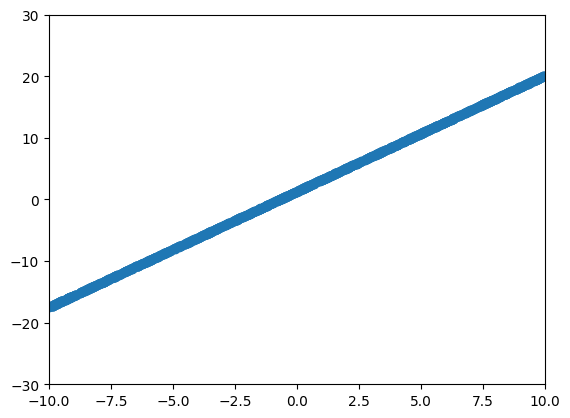

tensor(1.7061)


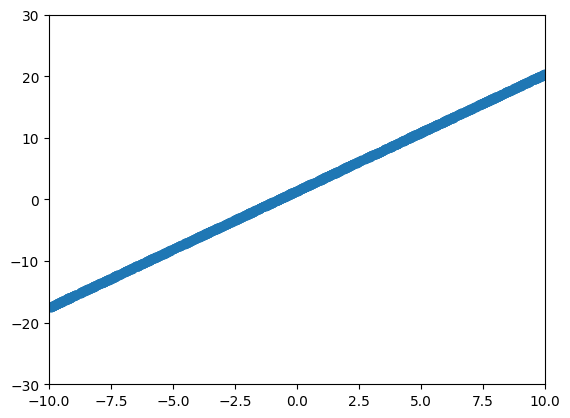

tensor(1.6040)


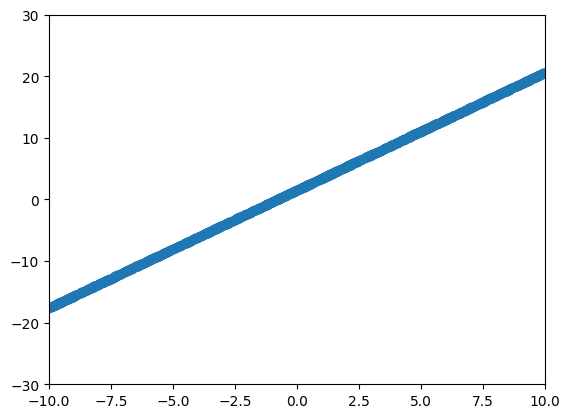

tensor(1.5018)


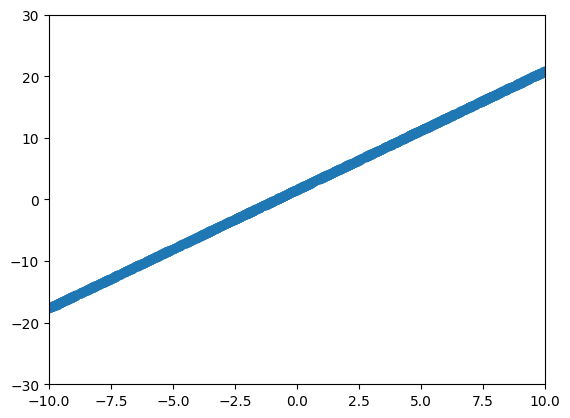

tensor(1.3996)


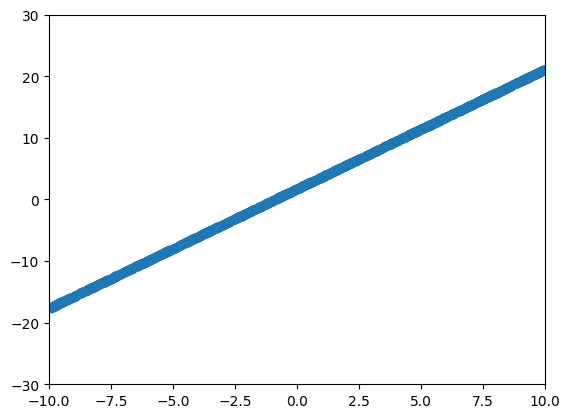

tensor(1.2975)


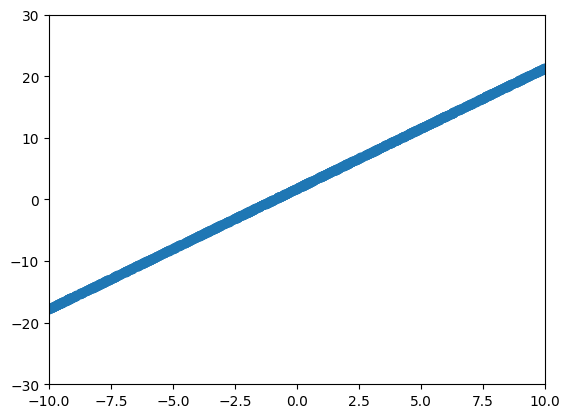

tensor(1.1953)


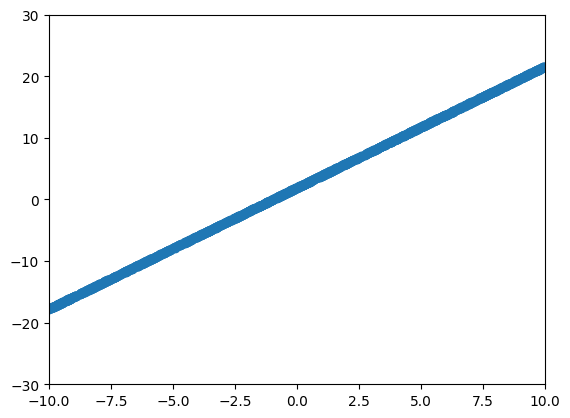

tensor(1.0932)


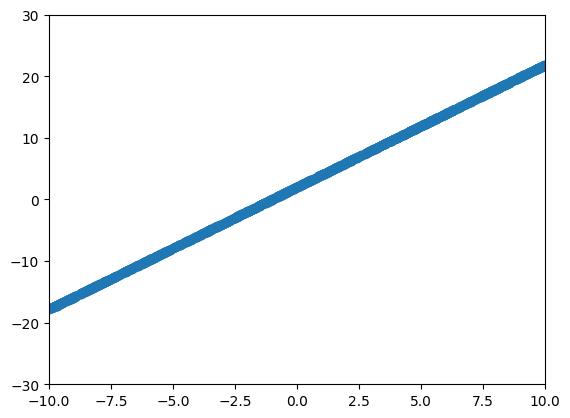

tensor(0.9910)


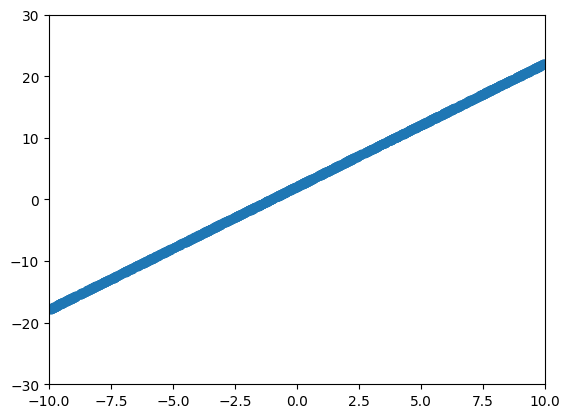

tensor(0.8889)


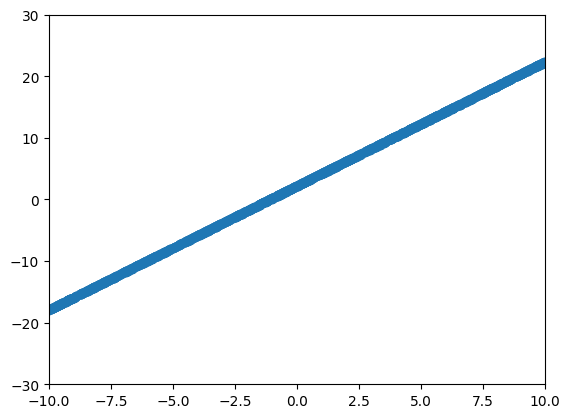

tensor(0.7867)


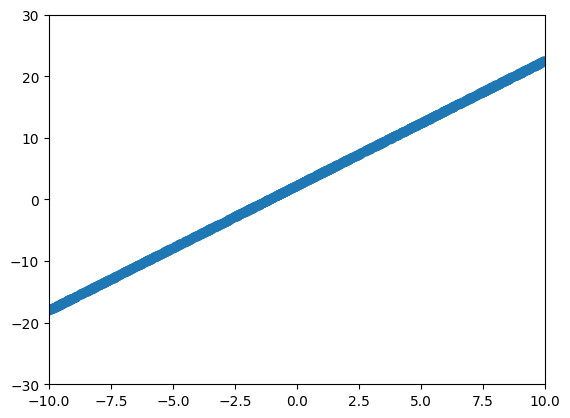

tensor(0.6857)


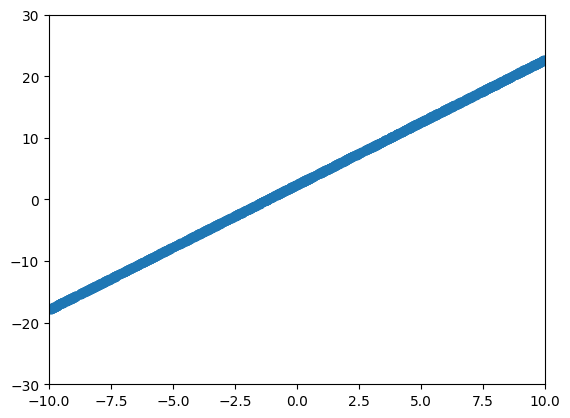

tensor(0.5889)


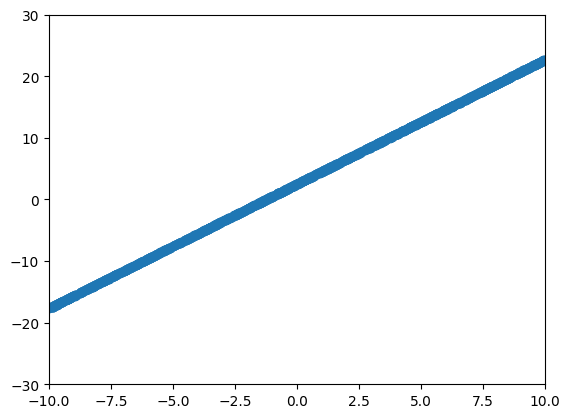

tensor(0.4947)


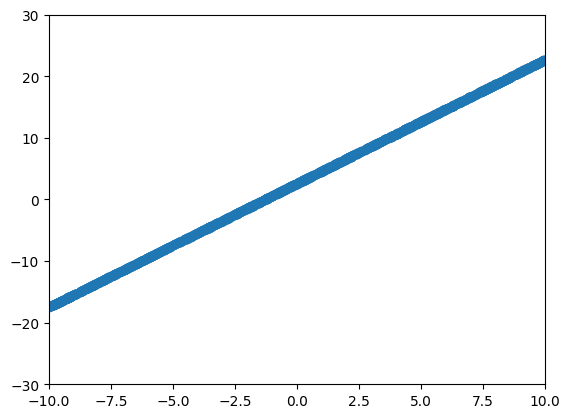

tensor(0.4028)


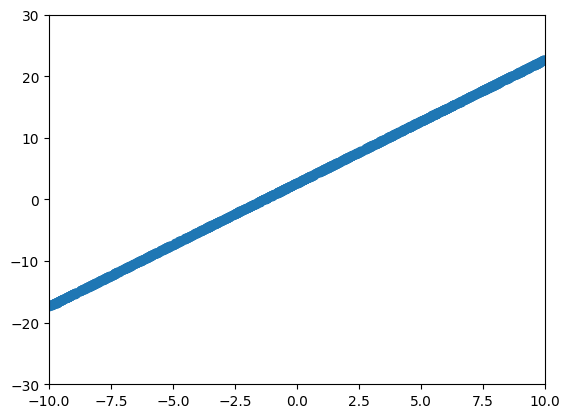

tensor(0.3209)


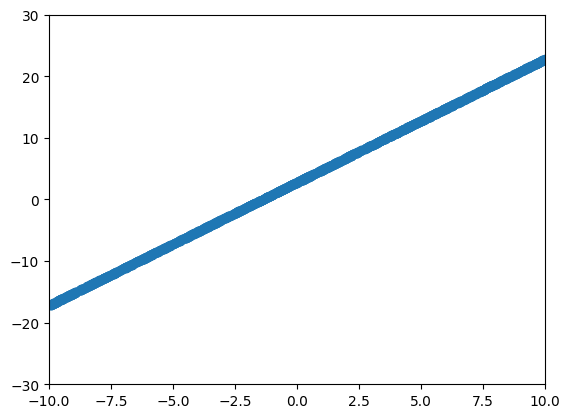

tensor(0.2557)


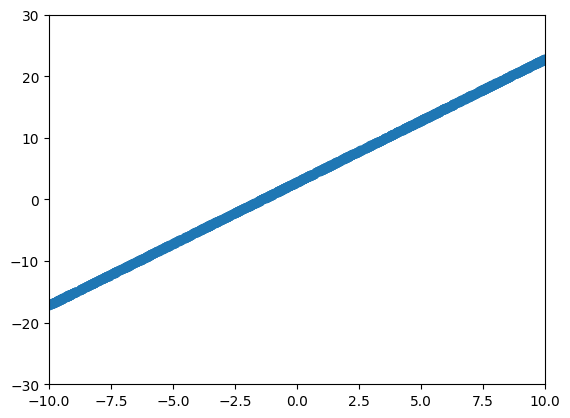

tensor(0.2100)


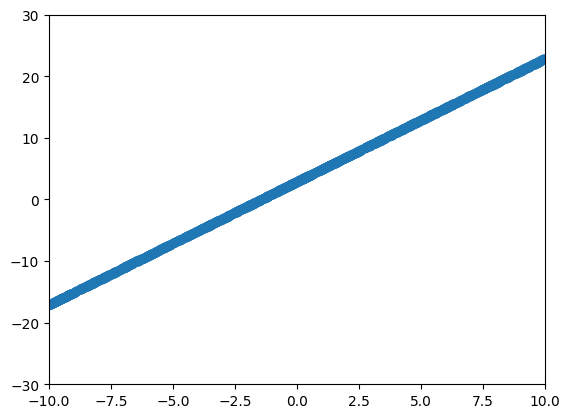

tensor(0.1838)


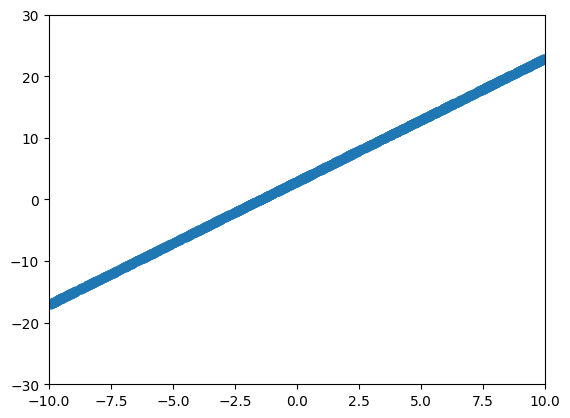

tensor(0.1720)


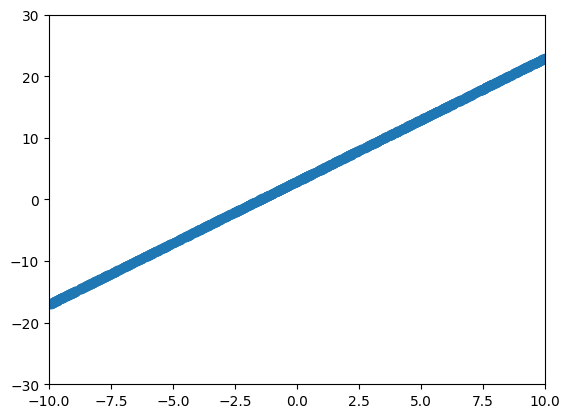

tensor(0.1668)


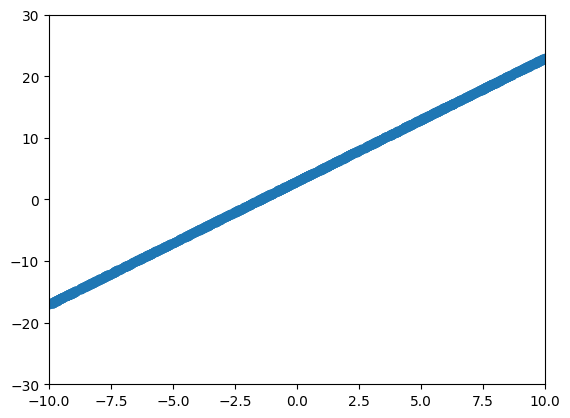

tensor(0.1640)


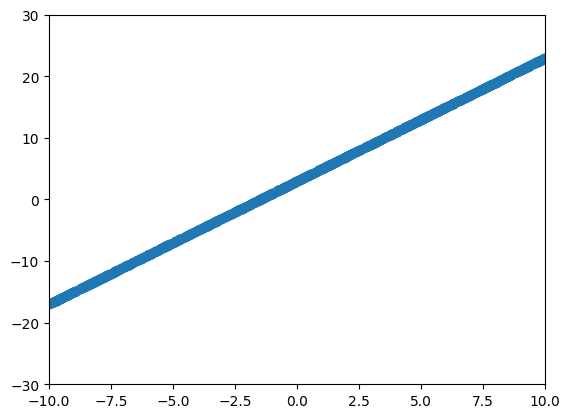

tensor(0.1622)


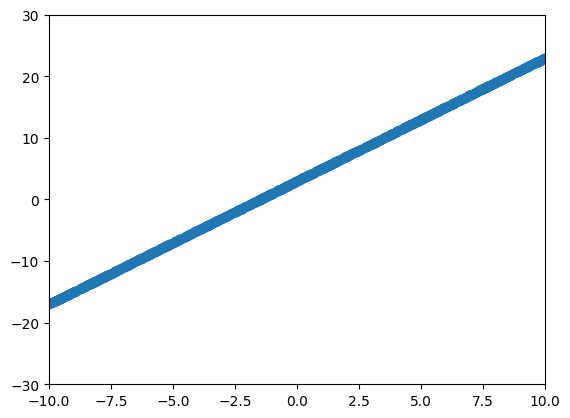

tensor(0.1613)


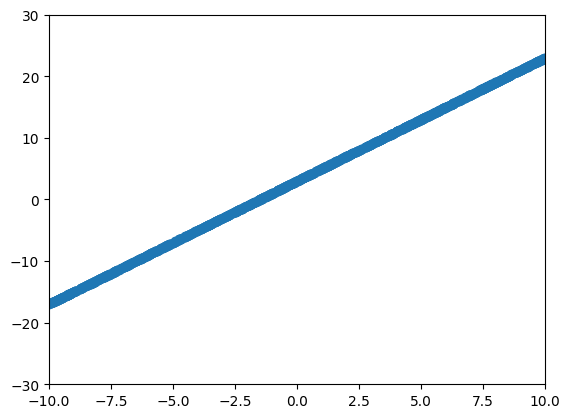

tensor(0.1610)


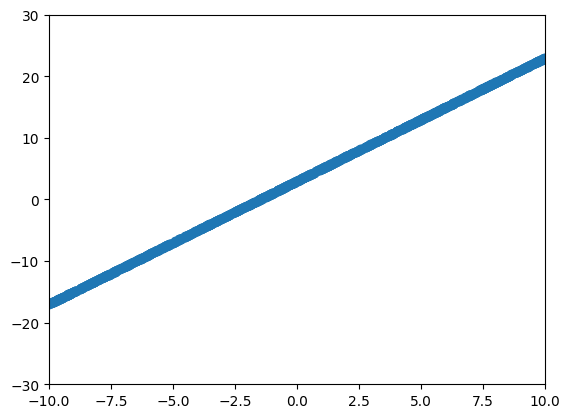

tensor(0.1608)


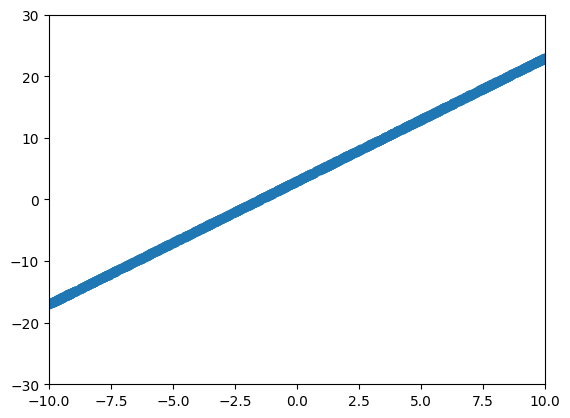

tensor(0.1607)


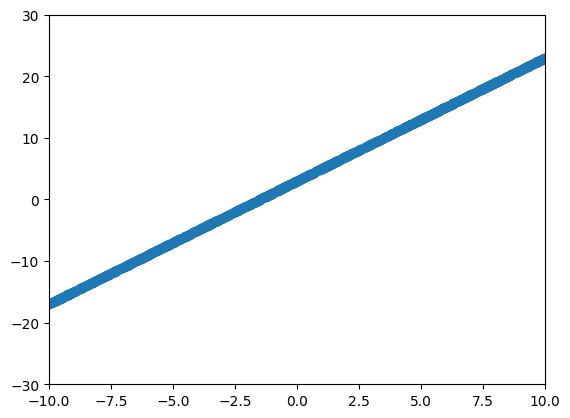

tensor(0.1607)


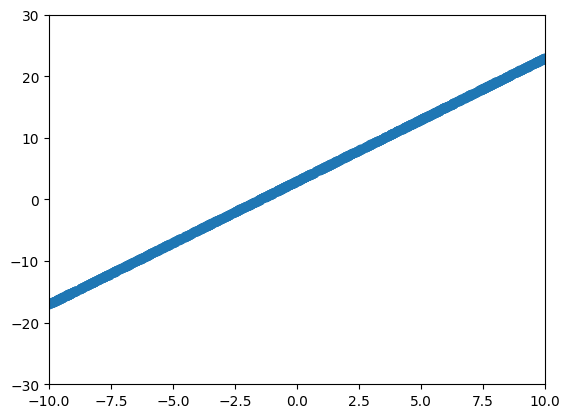

tensor(0.1607)


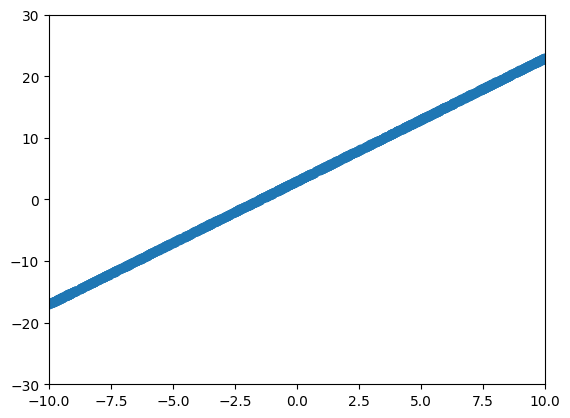

tensor(0.1607)


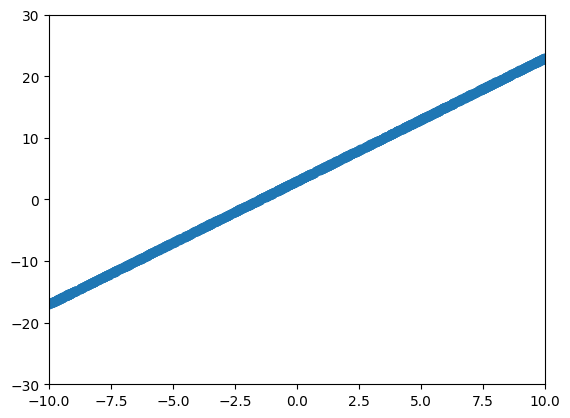

tensor(0.1607)


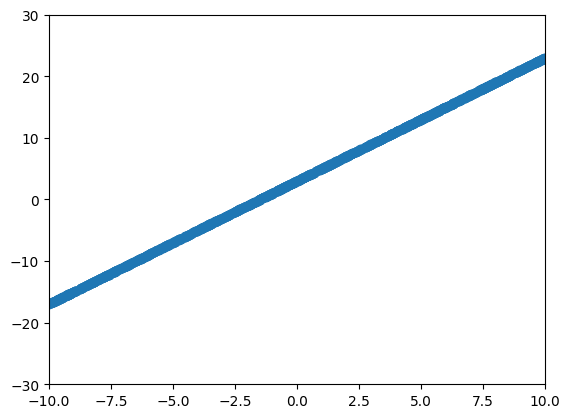

tensor(0.1607)


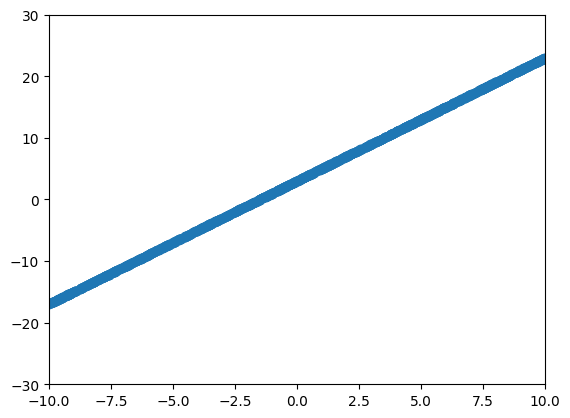

tensor(0.1607)


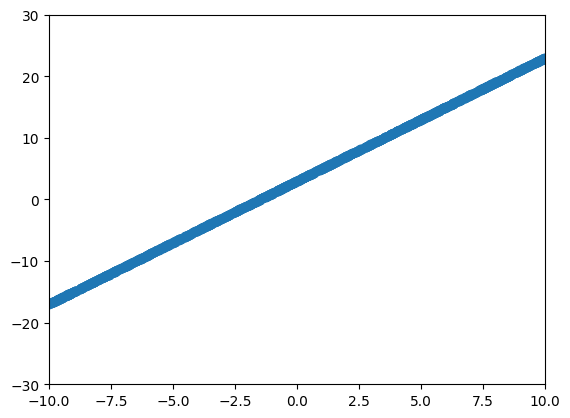

tensor(0.1607)


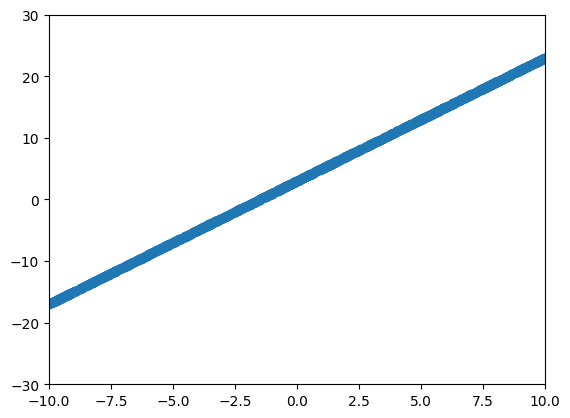

tensor(0.1607)


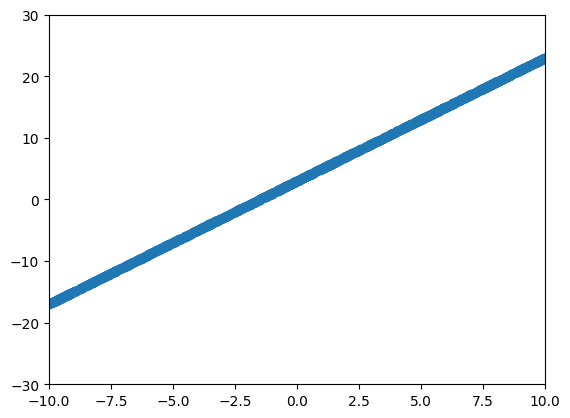

tensor(0.1607)


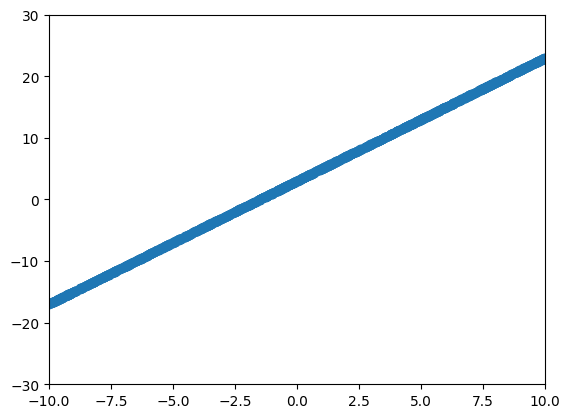

tensor(0.1607)


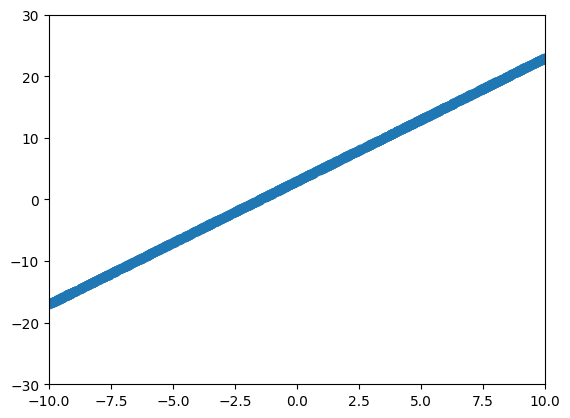

tensor(0.1607)


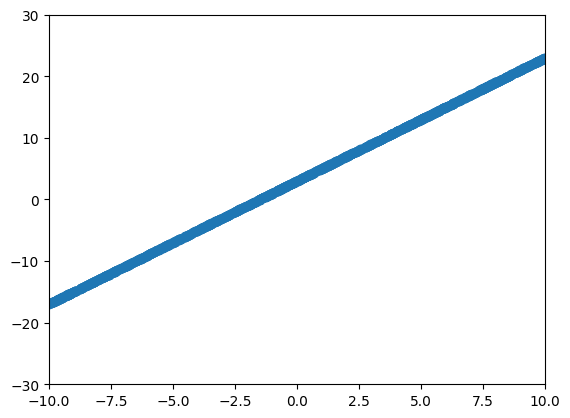

tensor(0.1607)


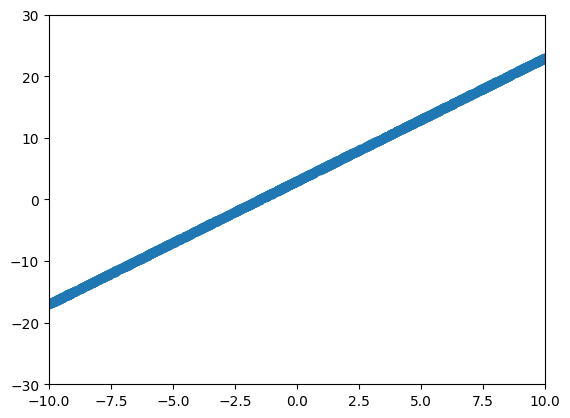

tensor(0.1607)


In [ ]:
loss_arr=[]
label=y_noise
for i in range(num_epoch):
  optimizer.zero_grad()
  output=model(x)
  loss=loss_func(output,label)
  loss.backward()
  optimizer.step()

  if i % 10==0:
    plt.scatter(x.detach().numpy(),output.detach().numpy())
    plt.axis([-10,10,-30,30])
    plt.show()
    print(loss.data)

  loss_arr.append(loss.detach().numpy())




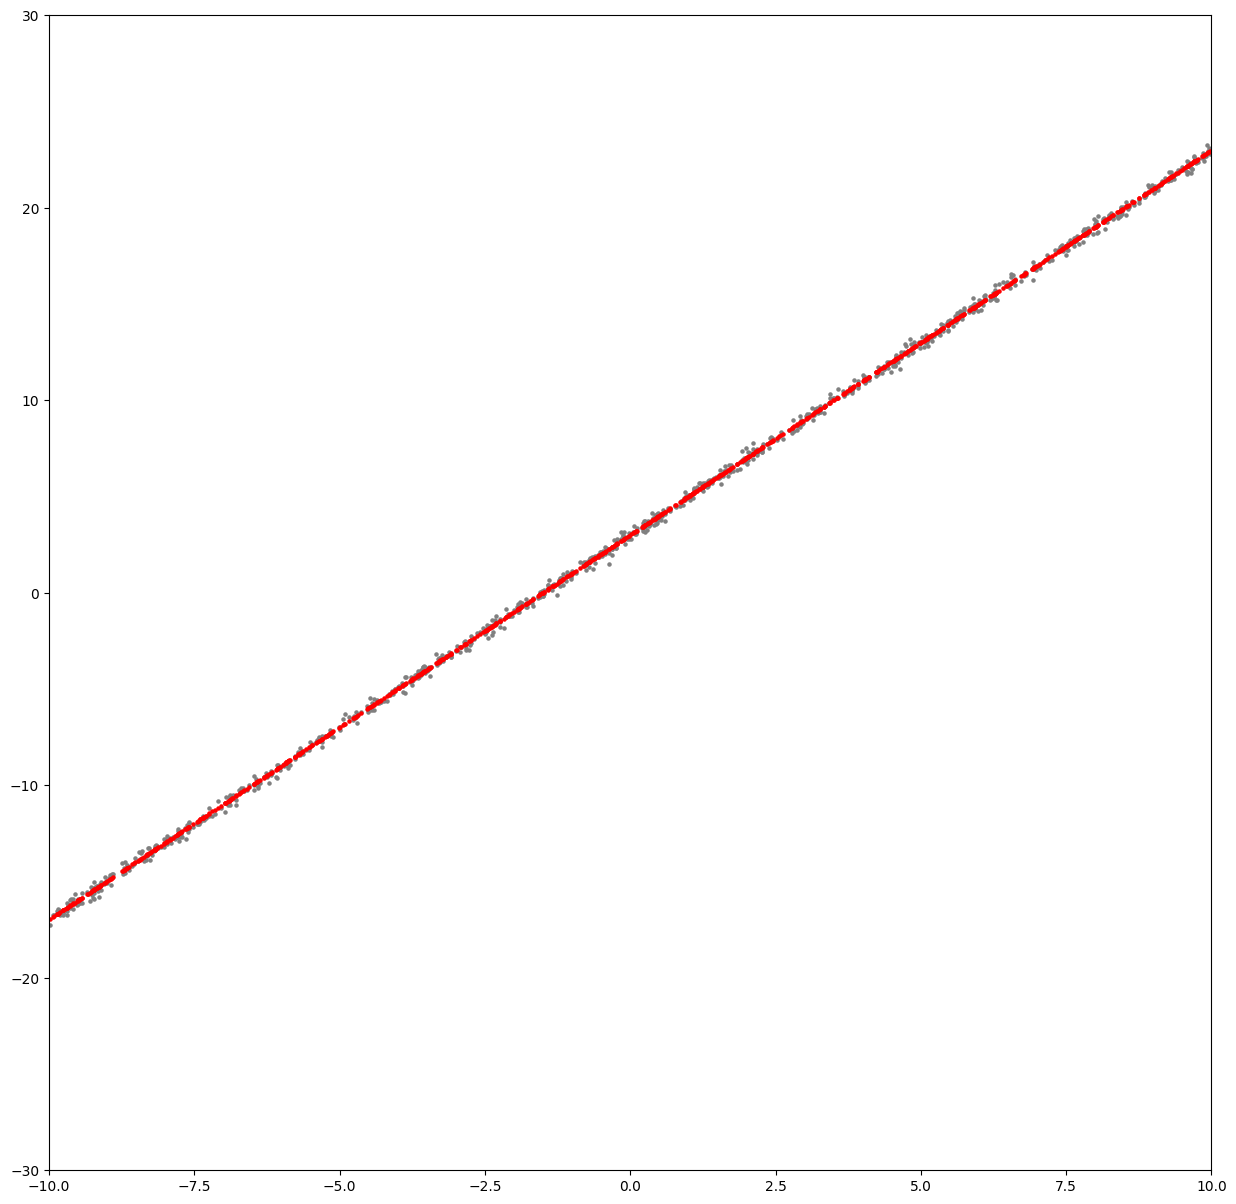

In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(x.numpy(),y_noise.numpy(),s=5,c="gray")
plt.scatter(x.detach().numpy(),output.detach().numpy(),s=5,c="red")
plt.axis([-10,10,-30,30])
plt.show()

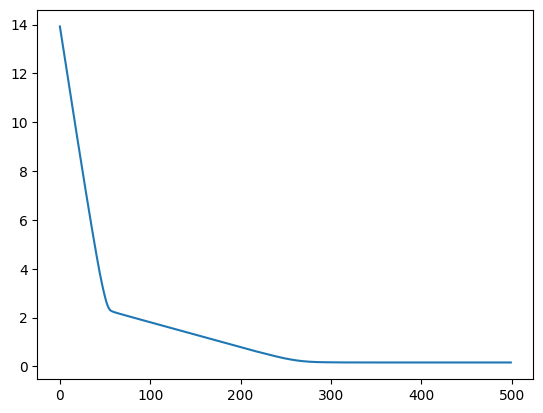

In [ ]:
plt.plot(loss_arr)
plt.show()

In [ ]:
param_list=list(model.parameters())
print("weight:",param_list[0].item(),"\nBias: ",param_list[1].item())


weight: 1.9991438388824463 
Bias:  3.0079846382141113
